# **Problemas de Búsqueda**

---
IVÁN MARTÍNEZ ESTRADA - A01661164 \\
ALAN URIEL MERLAN ESQUIVEL - A01656612 \\
HÉCTOR HIBRAN TAPIA FERNÁNDEZ - A01661114 \\
ELÍAS EDUARDO RODRÍGUEZ HERNÁNDEZ - A01654900 \\


---


Basado en [SimpleAI](https://simpleai.readthedocs.io/en/latest/search_problems.html) y https://github.com/PacktPublishing/Artificial-Intelligence-with-Python

## Problema 1


Los algoritmos de búsqueda clásicos de IA son muy buenos encontrando soluciones a algunos de los acertijos matemáticos que involucran números y figuras geométricas. Problemas como mover o quitar cerillos para formar figuras, cuadrados mágicos, el SUDOKU, entre otros, pueden ser resueltos por una computadora de manera muy eficiente y más rápido que un ser humano.

Consideren el ejemplo del triángulo mágico de 6 números, en el cual se deben colocar en las seis posiciones indicadas en la siguiente figura, los números del 1 al 6, de tal forma que todos los lados del triángulo sumen 10.

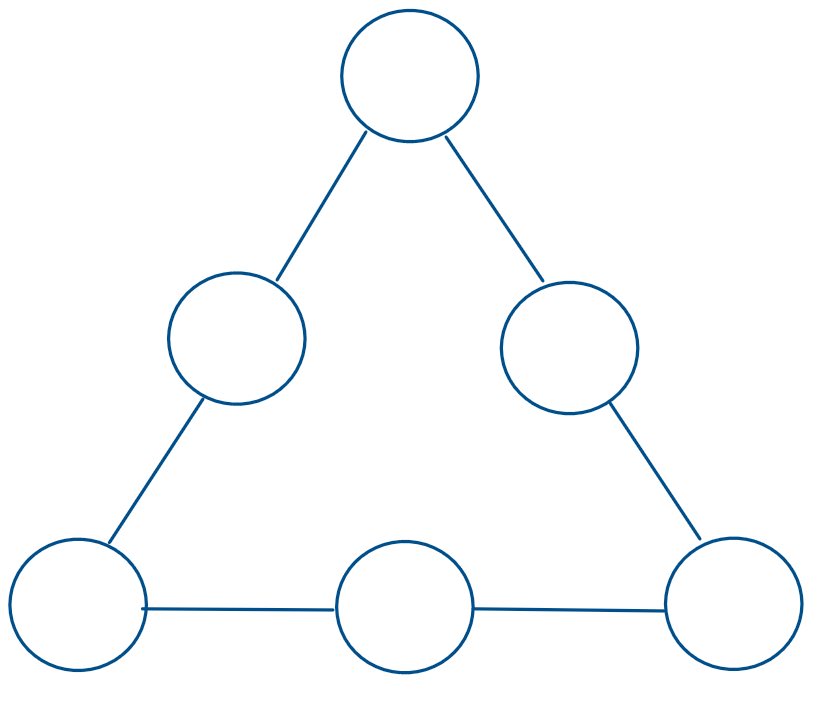

Para poder resolver el problema del triángulo mágico, se desea utilizar algoritmos de búsqueda no informada. Para ello, se considera que se inicia con un triángulo vacío, y se se colocan uno a uno los seis números, empezando con el 1, hasta llenar los 6 espacios. Es decir, al seleccionar el espacio del número 1, se procede a seleccionar el espacio para el número 2 entre los cinco círculos restantes, y así sucesivamente. Si al terminar de colocar los 6 números se tiene un triángulo donde sus tres lados suman 10, se tiene una solución válida.

**I. Formulen el problema de búsqueda que se desea resolver, describiendo los siguientes elementos:**

1. los estados del problema de búsqueda.
2. el estado inicial,
3. el estado objetivo,
4. las acciones que se pueden realizar para los estados,
5. lo que se obtiene con dichas acciones (modelo de transición).




Cada nodo de triangulo puede adquirir los siguientes valores o **estados**:

1.   {"1": list("123456"}
2.   {"2": list("123456"}
3.   {"3": list("123456"}
4.   {"4": list("123456"}
5.   {"5": list("123456"}
6.   {"6": list("123456"}

De manera que, los valores en cada nodo no se repitan. Por lo que, cada que se le asigna valor a un nodo el número asignado será puesto en la lista de visitados.

Los nodos estan puestos de las siguiente manera:

1

2     3

4    5    6

Por otra parte el **estado inicial**, es que en el nodo 1 inicie con 1. Para así ir recorriendo y cambiando el valor del resto de nodos de manera progresiva.

Para nuestro **estado objetivo**, buscamos que la suma de los estados de los nodos den 10 por cada lado del tríangulo.

La acción que cada nodo puede realizar es cambiar el valor que tiene.

Para el modelo de transición, es la lista de valores usados para cada nodo.



**II. Escriban un programa en Python que resuelva el problema del triángulo mágico utilizando los siguientes algoritmos:**

###Búsqueda de anchura



In [ ]:
!pip install simpleai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpleai.search import SearchProblem, breadth_first, depth_first
import time

# Definimos el triángulo mágico como una lista de listas
triangle = [[2], [4, 3], [5, 6, 4], [7, 8, 9, 6]]

class TriangleProblem(SearchProblem):
    def __init__(self, triangle):
        self.triangle = triangle
        self.num_rows = len(triangle)
        self.initial_state = (0, 0)

    def actions(self, state):
        i, j = state
        if i == self.num_rows - 1:
            # No hay más acciones posibles en la última fila
            return []
        elif j == 0:
            # Solo se puede mover a la derecha en la primera columna
            return [(1, 0)]
        elif j == i:
            # Solo se puede mover a la izquierda en la última columna
            return [(1, -1)]
        else:
            # Se puede mover a la izquierda o a la derecha en cualquier otra columna
            return [(1, -1), (1, 0)]

    def result(self, state, action):
        i, j = state
        di, dj = action
        return (i+di, j+dj)

    def is_goal(self, state):
        i, j = state
        return i == self.num_rows - 1

    def cost(self, state, action, state2):
        # No necesitamos costos para este problema
        return 1

    def heuristic(self, state):
        i, j = state
        remaining_rows = self.num_rows - i - 1
        remaining_nodes = (remaining_rows * (remaining_rows + 1)) // 2
        return remaining_nodes

In [ ]:
problem = TriangleProblem(triangle)

In [ ]:
# Busqueda en anchura
start_time = time.time()
result = breadth_first(problem)
print("Búsqueda en anchura:", result.state)
print("--- Tiempo de ejecución: %s segundos ---" % (time.time() - start_time))

Búsqueda en anchura: (3, 0)
--- Tiempo de ejecución: 0.0021009445190429688 segundos ---


###Búsqueda de profundidad.

In [ ]:
# Busqueda en profundidad
start_time = time.time()
result = depth_first(problem)
print("Búsqueda en profundidad:", result.state)
print("--- Tiempo de ejecución: %s segundos ---" % (time.time() - start_time))

Búsqueda en profundidad: (3, 0)
--- Tiempo de ejecución: 0.0016412734985351562 segundos ---


**III. ¿Qué algoritmo soluciona el problema de manera más rápida? ¿Por qué dicho algoritmo podría ser mejora para este problema?**

**Búsqueda de profundidad.** 

BFS significa Breadth First Search.
DFS significa búsqueda en profundidad primero.

BFS es un enfoque transversal en el que primero recorremos todos los nodos en el mismo nivel antes de pasar al siguiente nivel.

DFS también es un enfoque transversal en el que el recorrido comienza en el nodo raíz y continúa a través de los nodos en la medida de lo posible hasta llegar al nodo sin nodos cercanos no visitados.

En BFS no existe el concepto de retroceso.
El algoritmo DFS es un algoritmo recursivo que utiliza la idea de retroceder.

BFS requires more memory. 
DFS requires less memory. 

BFS is slow as compared to DFS.
DFS es rápida en comparación con BFS.

El DFS necesita menos memoria ya que solo tiene que realizar un seguimiento de los nodos en una cadena de arriba a abajo, mientras que el BFS tiene que realizar un seguimiento de todos los nodos en el mismo nivel.



## Solución hecha por fuerza bruta:

In [ ]:
#magic triangle
#sums
leftDiagonal=0
rightDiagonal=0
bottomRow=0
#nodes
top=0
leftMiddle=0
rightMiddle=0
bottomLeft=0
bottomRight=0
bottomMiddle=0

def changeTop(value):
    global leftDiagonal, rightDiagonal, bottomRow, top, leftMiddle, rightMiddle, bottomLeft, bottomRight, bottomMiddle
    leftDiagonal=leftMiddle+bottomLeft+value
    rightDiagonal=rightMiddle+bottomRight+value
    top=value

def changeLeftMiddle(value):
    global leftDiagonal, rightDiagonal, bottomRow, top, leftMiddle, rightMiddle, bottomLeft, bottomRight, bottomMiddle
    leftDiagonal=top+bottomLeft+value
    leftMiddle=value

def changeRightMiddle(value):
    global leftDiagonal, rightDiagonal, bottomRow, top, leftMiddle, rightMiddle, bottomLeft, bottomRight, bottomMiddle
    rightDiagonal=top+bottomRight+value
    rightMiddle=value

def changeBottomLeft(value):
    global leftDiagonal, rightDiagonal, bottomRow, top, leftMiddle, rightMiddle, bottomLeft, bottomRight, bottomMiddle
    leftDiagonal=top+leftMiddle+value
    bottomRow= bottomMiddle+bottomRight+value
    bottomLeft=value

def changeBottomRight(value):
    global leftDiagonal, rightDiagonal, bottomRow, top, leftMiddle, rightMiddle, bottomLeft, bottomRight, bottomMiddle
    rightDiagonal=top+rightMiddle+value
    bottomRow= bottomMiddle+bottomLeft+value
    bottomRight=value

def changeBottomMiddle(value):
    global leftDiagonal, rightDiagonal, bottomRow, top, leftMiddle, rightMiddle, bottomLeft, bottomRight, bottomMiddle
    bottomRow= bottomLeft+bottomRight+value
    bottomMiddle=value

#using only numbers from 1 to 6, fill the triangle so that the sums of the numbers in each row, column, and diagonal are all 10
def printTriangle():
    print("   ",top)
    print(" ",leftMiddle," ", rightMiddle)
    print(bottomLeft," ",bottomMiddle," ",bottomRight)
    print("--------------------")

#top
for top in range(1,7):
    #left middle
    for leftMiddle in range(1,7):
        #right middle
        for rightMiddle in range(1,7):
            #bottom left
            for bottomLeft in range(1,7):
                #bottom right
                for bottomRight in range(1,7):
                    #bottom middle
                    for bottomMiddle in range(1,7):
                        changeTop(top)
                        changeLeftMiddle(leftMiddle)
                        changeRightMiddle(rightMiddle)
                        changeBottomLeft(bottomLeft)
                        changeBottomRight(bottomRight)
                        changeBottomMiddle(bottomMiddle)
                        if leftDiagonal==10 and rightDiagonal==10 and bottomRow==10:
                            printTriangle()

    1
  3   6
6   1   3
--------------------
    1
  4   5
5   1   4
--------------------
    1
  4   6
5   2   3
--------------------
    1
  5   4
4   1   5
--------------------
    1
  5   5
4   2   4
--------------------
    1
  5   6
4   3   3
--------------------
    1
  6   3
3   1   6
--------------------
    1
  6   4
3   2   5
--------------------
    1
  6   5
3   3   4
--------------------
    1
  6   6
3   4   3
--------------------
    2
  2   5
6   1   3
--------------------
    2
  2   6
6   2   2
--------------------
    2
  3   4
5   1   4
--------------------
    2
  3   5
5   2   3
--------------------
    2
  3   6
5   3   2
--------------------
    2
  4   3
4   1   5
--------------------
    2
  4   4
4   2   4
--------------------
    2
  4   5
4   3   3
--------------------
    2
  4   6
4   4   2
--------------------
    2
  5   2
3   1   6
--------------------
    2
  5   3
3   2   5
--------------------
    2
  5   4
3   3   4
--------------------
    2
  5 

# Solución hecha con backtracking


In [ ]:
from simpleai.search import CspProblem, backtrack

vars = ['a', 'b', 'c', 'd', 'e', 'f']

# Abcdef puede tener 6 valores posibles, 1, 2, 3, 4, 5, 6, donde a es el valor de hasta arriba, b y c en medio, d, e y f en la base
domains = {}
for variable in vars:
    domains[variable] = [1, 2, 3, 4, 5, 6]

#constrains
def constraint_function(variables, values):
    a, b, c, d, e, f = values
    leftDiagonal = a + b + d
    rightDiagonal = a + c + f
    bottomRow = d + e + f
    return leftDiagonal == 10 and rightDiagonal == 10 and bottomRow == 10

constraints = [(vars, constraint_function)]


problem = CspProblem(vars, domains, constraints)

solution = backtrack(problem)


if solution is not None:
    a, b, c, d, e, f = solution.values()
    print("   ", a)
    print(" ", b, " ", c)
    print(d, " ", e, " ", f)
else:
    print("No solution found.")

    1
  3   6
6   1   3


## Problema 2

Utilicen el algoritmo A* para resolver el rompecabezas deslizante de 8 números (3x3). Utilicen como función heurística la cantidad elementos que están en la posición incorrecta. Corran su algoritmo para diferentes estados iniciales (tener cuidado con estados imposibles de resolver).

In [ ]:
from simpleai.search import SearchProblem, astar

# Define el estado inicial del rompecabezas
initial_state = (4, 3, 2, 1, 5, 6, 7, 8, 0)

# Define el estado final que deseamos del rompecabezas
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Definir la función heurística utilizando la cantidad de elementos que están en la posición incorrecta o en este caso la NO FINAL
def heuristic(state):
    distance = 0
    for i in range(0, 9):
        if state.index(i) != goal_state.index(i):
            distance += 1
    return distance

# Define el problema del rompecabezas como un objeto SearchProblem
class PuzzleProblem(SearchProblem):
    def cost(self, state1, action, state2):
        return 1

    def actions(self, state):
        actions = []
        i = state.index(0)
        if i % 3 != 0:
            actions.append(('izquierda', i, i-1))
        if i % 3 != 2:
            actions.append(('derecha', i, i+1))
        if i // 3 != 0:
            actions.append(('arriba', i, i-3))
        if i // 3 != 2:
            actions.append(('abajo', i, i+3))
        return actions

    def result(self, state, action):
        state = list(state)
        state[action[1]], state[action[2]] = state[action[2]], state[action[1]]
        return tuple(state)

    def is_goal(self, state):
        return state == goal_state

    def heuristic(self, state):
        return heuristic(state)

# Resuelve el rompecabezas usando el algoritmo A*
problem = PuzzleProblem(initial_state)
result = astar(problem, graph_search=True)

# Imprime la solución
for action, state in result.path():
    print('Mueve', action)
    print(state[0], state[1], state[2])
    print(state[3], state[4], state[5])
    print(state[6], state[7], state[8])
    print()

Mueve None
4 3 2
1 5 6
7 8 0

Mueve ('arriba', 8, 5)
4 3 2
1 5 0
7 8 6

Mueve ('arriba', 5, 2)
4 3 0
1 5 2
7 8 6

Mueve ('izquierda', 2, 1)
4 0 3
1 5 2
7 8 6

Mueve ('abajo', 1, 4)
4 5 3
1 0 2
7 8 6

Mueve ('izquierda', 4, 3)
4 5 3
0 1 2
7 8 6

Mueve ('arriba', 3, 0)
0 5 3
4 1 2
7 8 6

Mueve ('derecha', 0, 1)
5 0 3
4 1 2
7 8 6

Mueve ('abajo', 1, 4)
5 1 3
4 0 2
7 8 6

Mueve ('derecha', 4, 5)
5 1 3
4 2 0
7 8 6

Mueve ('abajo', 5, 8)
5 1 3
4 2 6
7 8 0

Mueve ('izquierda', 8, 7)
5 1 3
4 2 6
7 0 8

Mueve ('izquierda', 7, 6)
5 1 3
4 2 6
0 7 8

Mueve ('arriba', 6, 3)
5 1 3
0 2 6
4 7 8

Mueve ('arriba', 3, 0)
0 1 3
5 2 6
4 7 8

Mueve ('derecha', 0, 1)
1 0 3
5 2 6
4 7 8

Mueve ('abajo', 1, 4)
1 2 3
5 0 6
4 7 8

Mueve ('izquierda', 4, 3)
1 2 3
0 5 6
4 7 8

Mueve ('abajo', 3, 6)
1 2 3
4 5 6
0 7 8

Mueve ('derecha', 6, 7)
1 2 3
4 5 6
7 0 8

Mueve ('derecha', 7, 8)
1 2 3
4 5 6
7 8 0



Cambien la función heurística por la cantidad de movimientos necesarios para poner una pieza en su lugar correcto. ¿Cuál función heurística consideran que es la más apropiada?

In [ ]:
from simpleai.search import SearchProblem, astar

# Define el estado inicial del rompecabezas
initial_state = (4, 3, 2, 1, 5, 6, 7, 8, 0)

# Define el estado final que deseamos del rompecabezas
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Define la función heurística
def heuristic(state):
    distance = 0
    for i, number in enumerate(state):
        if number != goal_state[i] and number != 0:
           # Calcula el número de movimientos necesarios para poner el número en su posición correcta
            goal_index = goal_state.index(number)
            distance += abs(i % 3 - goal_index % 3) + abs(i // 3 - goal_index // 3)
    return distance

# Defina el problema del rompecabezas como un objeto SearchProblem
class PuzzleProblem(SearchProblem):
    def cost(self, state1, action, state2):
        return 1

    def actions(self, state):
        actions = []
        i = state.index(0)
        if i % 3 != 0:
            actions.append(('izquierda', i, i-1))
        if i % 3 != 2:
            actions.append(('derecha', i, i+1))
        if i // 3 != 0:
            actions.append(('arriba', i, i-3))
        if i // 3 != 2:
            actions.append(('abajo', i, i+3))
        return actions

    def result(self, state, action):
        state = list(state)
        state[action[1]], state[action[2]] = state[action[2]], state[action[1]]
        return tuple(state)

    def is_goal(self, state):
        return state == goal_state

    def heuristic(self, state):
        return heuristic(state)

# Resuelve el rompecabezas usando el algoritmo A*
problem = PuzzleProblem(initial_state)
result = astar(problem, graph_search=True)

# Imprime la solución
for action, state in result.path():
    print('Mueve', action)
    print(state[0], state[1], state[2])
    print(state[3], state[4], state[5])
    print(state[6], state[7], state[8])
    print()

Mueve None
4 3 2
1 5 6
7 8 0

Mueve ('izquierda', 8, 7)
4 3 2
1 5 6
7 0 8

Mueve ('arriba', 7, 4)
4 3 2
1 0 6
7 5 8

Mueve ('arriba', 4, 1)
4 0 2
1 3 6
7 5 8

Mueve ('izquierda', 1, 0)
0 4 2
1 3 6
7 5 8

Mueve ('abajo', 0, 3)
1 4 2
0 3 6
7 5 8

Mueve ('abajo', 3, 6)
1 4 2
7 3 6
0 5 8

Mueve ('derecha', 6, 7)
1 4 2
7 3 6
5 0 8

Mueve ('derecha', 7, 8)
1 4 2
7 3 6
5 8 0

Mueve ('arriba', 8, 5)
1 4 2
7 3 0
5 8 6

Mueve ('izquierda', 5, 4)
1 4 2
7 0 3
5 8 6

Mueve ('arriba', 4, 1)
1 0 2
7 4 3
5 8 6

Mueve ('derecha', 1, 2)
1 2 0
7 4 3
5 8 6

Mueve ('abajo', 2, 5)
1 2 3
7 4 0
5 8 6

Mueve ('abajo', 5, 8)
1 2 3
7 4 6
5 8 0

Mueve ('izquierda', 8, 7)
1 2 3
7 4 6
5 0 8

Mueve ('izquierda', 7, 6)
1 2 3
7 4 6
0 5 8

Mueve ('arriba', 6, 3)
1 2 3
0 4 6
7 5 8

Mueve ('derecha', 3, 4)
1 2 3
4 0 6
7 5 8

Mueve ('abajo', 4, 7)
1 2 3
4 5 6
7 0 8

Mueve ('derecha', 7, 8)
1 2 3
4 5 6
7 8 0



## Problema 3

Utilicen el algoritmo A* para encontrar un camino entre los dos puntos indicados en el siguiente laberinto.



```
++++++++++++++++++++++
+ O +   ++ ++        +
+     +     +++++++ ++
+ +    ++  ++++ +++ ++
+ +   + + ++         +
+          ++  ++  + +
+++++ + +      ++  + +
+++++ +++  + +  ++   +
+          + +  + +  +
+++++ +  + + +     X +
++++++++++++++++++++++
```

El símbolo + indica un obstáculo o pared. El símbolo O representa el punto de inicio, y X indica el objetivo.

Inventen otros tres laberintos, y prueben de nuevo el algoritmo A*.

Nota: Usen como heurística la distancia entre el punto actual y el punto objetivo.

### Laberinto 1

In [ ]:
import math
from simpleai.search import SearchProblem, astar

# Class containing the methods to solve the maze
class MazeSolver(SearchProblem):
    # Initialize the class 
    def __init__(self, board):
        self.board = board
        self.goal = (0, 0)

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "o":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "x":
                    self.goal = (x, y)

        super(MazeSolver, self).__init__(initial_state=self.initial)

    # Define the method that takes actions
    # to arrive at the solution
    def actions(self, state):
        actions = []
        for action in COSTS.keys():
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "+":
                actions.append(action)

        return actions

    # Update the state based on the action
    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)

        return new_state

    # Check if we have reached the goal
    def is_goal(self, state):
        return state == self.goal

    # Compute the cost of taking an action
    def cost(self, state, action, state2):
        return COSTS[action]

    # Heuristic that we use to arrive at the solution
    def heuristic(self, state):
        x, y = state
        gx, gy = self.goal

        return math.sqrt((x - gx) ** 2 + (y - gy) ** 2)

if __name__ == "__main__":
    # Define the map
    MAP = """
    ++++++++++++++++++++++
    + O +   ++ ++        +
    +     +     +++++++ ++
    + +    ++  ++++ +++ ++
    + +   + + ++         +
    +          ++  ++  + +
    +++++ + +      ++  + +
    +++++ +++  + +  ++   +
    +          + +  + +  +
    +++++ +  + + +     X +
    ++++++++++++++++++++++
    """

    # Convert map to a list
    print(MAP)
    MAP = [list(x) for x in MAP.split("\n") if x]

    # Define cost of moving around the map
    cost_regular = 1.0
    cost_diagonal = 2

    # Create the cost dictionary
    COSTS = {
        "up": cost_regular,
        "down": cost_regular,
        "left": cost_regular,
        "right": cost_regular,
        "up left": cost_diagonal,
        "up right": cost_diagonal,
        "down left": cost_diagonal,
        "down right": cost_diagonal,
    }

    # Create maze solver object
    problem = MazeSolver(MAP)

    # Run the solver
    result = astar(problem, graph_search=True)

    # Extract the path
    path = [x[1] for x in result.path()]

    # Print the result
    print()
    for y in range(len(MAP)):
        for x in range(len(MAP[y])):
            if (x, y) == problem.initial:
                print('o', end='')
            elif (x, y) == problem.goal:
                print('x', end='')
            elif (x, y) in path:
                print('·', end='')
            else:
                print(MAP[y][x], end='')

        print()


    ++++++++++++++++++++++
    + O +   ++ ++        +
    +     +     +++++++ ++
    + +    ++  ++++ +++ ++
    + +   + + ++         +
    +          ++  ++  + +
    +++++ + +      ++  + +
    +++++ +++  + +  ++   +
    +          + +  + +  +
    +++++ +  + + +     X +
    ++++++++++++++++++++++
    

    ++++++++++++++++++++++
    + o·+   ++ ++        +
    +   ··+     +++++++ ++
    + +   ·++  ++++ +++ ++
    + +   +·+ ++         +
    +       ···++  ++  + +
    +++++ + +  ··· ++  + +
    +++++ +++  + +· ++   +
    +          + + ·+ +  +
    +++++ +  + + +  ···x +
    ++++++++++++++++++++++
    


### Laberinto 2

In [ ]:
import math
from simpleai.search import SearchProblem, astar

# Class containing the methods to solve the maze
class MazeSolver(SearchProblem):
    # Initialize the class 
    def __init__(self, board):
        self.board = board
        self.goal = (0, 0)

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "o":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "x":
                    self.goal = (x, y)

        super(MazeSolver, self).__init__(initial_state=self.initial)

    # Define the method that takes actions
    # to arrive at the solution
    def actions(self, state):
        actions = []
        for action in COSTS.keys():
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "+":
                actions.append(action)

        return actions

    # Update the state based on the action
    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)

        return new_state

    # Check if we have reached the goal
    def is_goal(self, state):
        return state == self.goal

    # Compute the cost of taking an action
    def cost(self, state, action, state2):
        return COSTS[action]

    # Heuristic that we use to arrive at the solution
    def heuristic(self, state):
        x, y = state
        gx, gy = self.goal

        return math.sqrt((x - gx) ** 2 + (y - gy) ** 2)

if __name__ == "__main__":
    # Define the map
    MAP = """
    ++++++++++++++++++++++
    + X +   ++ ++        +
    +     +     +++++++ ++
    + +    ++  ++++ +++ ++
    + +   + + ++         +
    +          ++  ++  + +
    +++++ + +      ++  + +
    +++++ +++  + +  ++   +
    +          + +  + +  +
    +++++ +  + + +     O +
    ++++++++++++++++++++++
    """

    # Convert map to a list
    print(MAP)
    MAP = [list(x) for x in MAP.split("\n") if x]

    # Define cost of moving around the map
    cost_regular = 1.0
    cost_diagonal = 2

    # Create the cost dictionary
    COSTS = {
        "up": cost_regular,
        "down": cost_regular,
        "left": cost_regular,
        "right": cost_regular,
        "up left": cost_diagonal,
        "up right": cost_diagonal,
        "down left": cost_diagonal,
        "down right": cost_diagonal,
    }

    # Create maze solver object
    problem = MazeSolver(MAP)

    # Run the solver
    result = astar(problem, graph_search=True)

    # Extract the path
    path = [x[1] for x in result.path()]

    # Print the result
    print()
    for y in range(len(MAP)):
        for x in range(len(MAP[y])):
            if (x, y) == problem.initial:
                print('o', end='')
            elif (x, y) == problem.goal:
                print('x', end='')
            elif (x, y) in path:
                print('·', end='')
            else:
                print(MAP[y][x], end='')

        print()


    ++++++++++++++++++++++
    + X +   ++ ++        +
    +     +     +++++++ ++
    + +    ++  ++++ +++ ++
    + +   + + ++         +
    +          ++  ++  + +
    +++++ + +      ++  + +
    +++++ +++  + +  ++   +
    +          + +  + +  +
    +++++ +  + + +     O +
    ++++++++++++++++++++++
    

    ++++++++++++++++++++++
    + x +   ++ ++        +
    +  ·  +     +++++++ ++
    + + ·  ++  ++++ +++ ++
    + +  ·+ + ++         +
    +     ···  ++  ++  + +
    +++++ + +····· ++  + +
    +++++ +++  + +· ++   +
    +          + + ·+ +  +
    +++++ +  + + +  ···o +
    ++++++++++++++++++++++
    


### Laberinto 3

In [ ]:
import math
from simpleai.search import SearchProblem, astar

# Class containing the methods to solve the maze
class MazeSolver(SearchProblem):
    # Initialize the class 
    def __init__(self, board):
        self.board = board
        self.goal = (0, 0)

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "o":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "x":
                    self.goal = (x, y)

        super(MazeSolver, self).__init__(initial_state=self.initial)

    # Define the method that takes actions
    # to arrive at the solution
    def actions(self, state):
        actions = []
        for action in COSTS.keys():
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "+":
                actions.append(action)

        return actions

    # Update the state based on the action
    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)

        return new_state

    # Check if we have reached the goal
    def is_goal(self, state):
        return state == self.goal

    # Compute the cost of taking an action
    def cost(self, state, action, state2):
        return COSTS[action]

    # Heuristic that we use to arrive at the solution
    def heuristic(self, state):
        x, y = state
        gx, gy = self.goal

        return math.sqrt((x - gx) ** 2 + (y - gy) ** 2)

if __name__ == "__main__":
    # Define the map
    MAP = """
    ++++++++++++++++++++++
    +  +   ++ ++       O +
    +     +     +++++++ ++
    + +    ++  ++++ +++ ++
    + +   + + ++         +
    +          ++  ++  + +
    +++++ + +      ++  + +
    +++++ +++  + +  ++   +
    +   X      + +  + +  +
    +++++ +  + + +       +
    ++++++++++++++++++++++
    """

    # Convert map to a list
    print(MAP)
    MAP = [list(x) for x in MAP.split("\n") if x]

    # Define cost of moving around the map
    cost_regular = 1.0
    cost_diagonal = 2

    # Create the cost dictionary
    COSTS = {
        "up": cost_regular,
        "down": cost_regular,
        "left": cost_regular,
        "right": cost_regular,
        "up left": cost_diagonal,
        "up right": cost_diagonal,
        "down left": cost_diagonal,
        "down right": cost_diagonal,
    }

    # Create maze solver object
    problem = MazeSolver(MAP)

    # Run the solver
    result = astar(problem, graph_search=True)

    # Extract the path
    path = [x[1] for x in result.path()]

    # Print the result
    print()
    for y in range(len(MAP)):
        for x in range(len(MAP[y])):
            if (x, y) == problem.initial:
                print('o', end='')
            elif (x, y) == problem.goal:
                print('x', end='')
            elif (x, y) in path:
                print('·', end='')
            else:
                print(MAP[y][x], end='')

        print()


    ++++++++++++++++++++++
    +  +   ++ ++       O +
    +     +     +++++++ ++
    + +    ++  ++++ +++ ++
    + +   + + ++         +
    +          ++  ++  + +
    +++++ + +      ++  + +
    +++++ +++  + +  ++   +
    +   X      + +  + +  +
    +++++ +  + + +       +
    ++++++++++++++++++++++
    

    ++++++++++++++++++++++
    +  +   ++ ++·······o +
    +     +    ·+++++++ ++
    + +    ++ ·++++ +++ ++
    + +   + +·++         +
    +     ···  ++  ++  + +
    +++++·+ +      ++  + +
    +++++·+++  + +  ++   +
    +   x      + +  + +  +
    +++++ +  + + +       +
    ++++++++++++++++++++++
    
